In [48]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
import matplotlib.pyplot as plt

In [49]:
X, y = fetch_openml('mnist_784', version=1, cache=True, return_X_y=True)
train_x, test_x = X[:60000], X[60000:] # total is 70000
train_y, test_y = y[:60000], y[60000:]

In [10]:
%%time
# EXERCISE 9
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=5000, n_jobs=-1)
rfc.fit(train_x, train_y)
print(rfc.score(train_x, train_y), end=" ")
print(rfc.score(test_x,test_y))

1.0 0.972
CPU times: user 2min 10s, sys: 427 ms, total: 2min 11s
Wall time: 9.43 s


In [5]:
pca = PCA(n_components=0.95)
train_reduced_x = pca.fit_transform(train_x)
test_reduced_x = pca.transform(test_x)

In [6]:
%%time
rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=5000, n_jobs=-1)
rfc.fit(train_reduced_x, train_y)
print(rfc.score(train_reduced_x, train_y), end=" ")
print(rfc.score(test_reduced_x,test_y))

0.9997166666666667 0.9506
CPU times: user 3min 12s, sys: 254 ms, total: 3min 12s
Wall time: 13 s


In [57]:
# EXERCISE 10
def my_plot(X, y):
    plt.figure(figsize=(13,10))
    plt.scatter(x=X[:, 0], y=X[:, 1], c=y.astype(int), cmap="jet")
    plt.axis('off')
    plt.colorbar()
    plt.show()

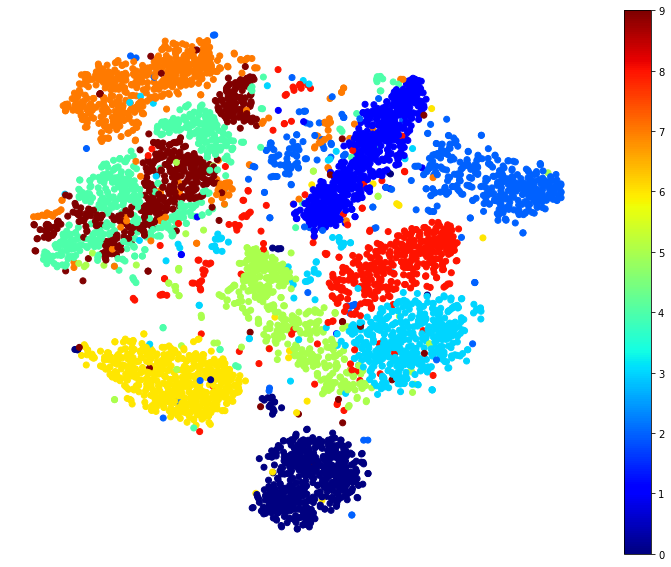

In [58]:
tsne = TSNE(n_components=2, perplexity=75.0, learning_rate=1000, random_state=42, n_jobs=-1)
X_embedded = tsne.fit_transform(X[:5000])    
my_plot(X_embedded, y[:5000])

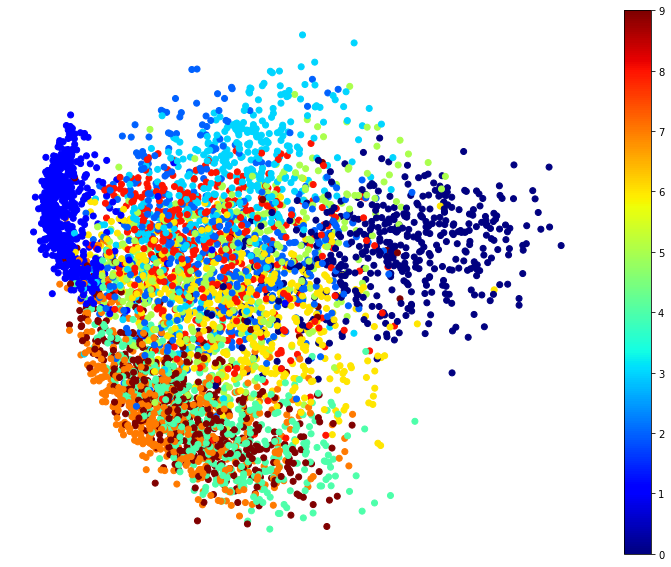

In [59]:
pca = PCA(n_components=2, random_state=42)
X_embedded = pca.fit_transform(X[:5000])    
my_plot(X_embedded, y[:5000])

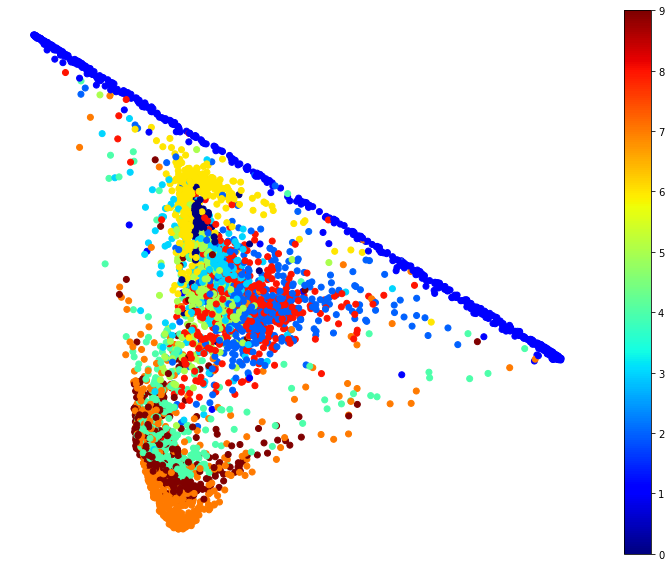

In [60]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=50, reg=0.1, 
                              random_state=42, n_jobs=-1)
X_embedded = lle.fit_transform(X[:5000])    
my_plot(X_embedded, y[:5000])

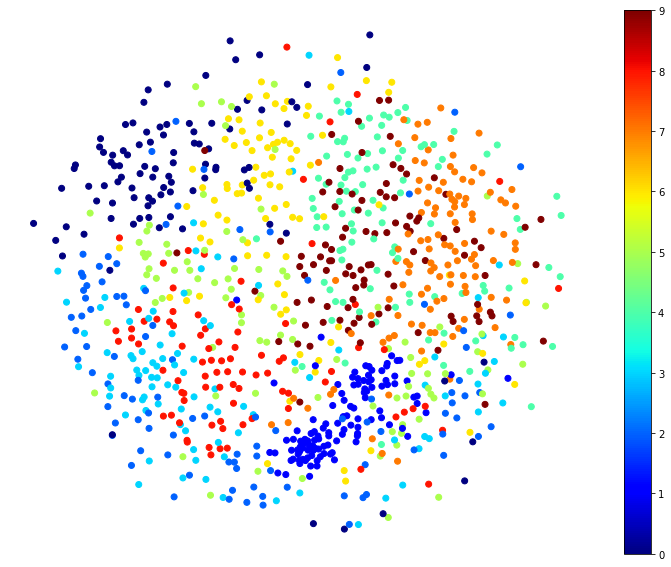

In [62]:
mds = MDS(n_components=2, n_init=10, n_jobs=-1, random_state=42)
X_embedded = mds.fit_transform(X[:1000])
my_plot(X_embedded, y[:1000])